In [217]:
#Author: Tyler Bailey
#Will add a .py file as well later

In [218]:
#README
#This is a simple script that takes into account the high neutron capture economy of Cd-113
#We are assuming that the loss of Cd-112 is pretty much small negiligble 
#Main assumptions: 
#we are only assuming natural Cd
#we are only taking account of Cd-112 and Cd-113
#Cd-112 has an abundance of 24.11 at%
#Cd-113 has an abundance of 12.23 at%
#For now we want the metal to have > 10.00 at% Cd-113; This is arbitrary

In [219]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [220]:
#The majority of this data was extracted from https://www-nds.iaea.org/exfor/endf.htm 
#Units are CGS
density = 8.65
moles_per_volume = 8.65/112.411
atoms_per_volume = moles_per_volume*6.02*10**23
cd_112 = atoms_per_volume*.2411 #intital amount of Cd-112; this can produce the neutron absorber Cd-113
cd_113 = atoms_per_volume*.1223 #initial amount of Cd-113; this what we are concerned with
sigma_112 = 10 * 10**-24
sigma_113 = 10**5 * 10**-24
flux = 10**9

In [226]:
#This only computes and prints our start amount of Cd-113 and our end amount of Cd-113 
print('starting amount of Cd 113')
print(cd_113)
print('10% of Cd 113')
print(atoms_per_volume*.1)


starting amount of Cd 113
3.4280398822590964e+21
10% of Cd 113
4.6323758351051055e+21


In [222]:

def main(cd_112, cd_113, t=10**8):
    '''
    Main function
    This computes the the neutron+target reaction rate for both isotopes
    negative rate is a loss while postive rate is a gain
    This is discretized with time intervals of .1 gigaseconds
    x is the amount of Cd-113 atoms used up after an interval
    z is the amount of Cd-112 atoms that remain after an interval
    y is the amount of Cd-113 atoms that remain after an interval
    this only returns z and y
    
    '''
    rate_112 = sigma_112*cd_112*flux
    rate_113 = sigma_113*cd_113*flux
    net_rate = rate_112 - rate_113
    x = net_rate * t
    z = cd_112 - (rate_112*t)
    y = cd_113 + x
    return z, y



    

In [223]:
#graph preparation. Time from t=0s to t=.5*10^11s with time interval 10**8s
cd_112_lst = []
cd_113_lst = []
time = []
time.append(0)
cd_112_lst.append(cd_112)
cd_113_lst.append(cd_113)
i = 10**8
while i <= .05*10**11:
    time.append(i)
    i+=10**8


In [224]:
#more graph preparation
i = 0
while i < len(time)-1:
    cd_112, cd_113 = main(cd_112, cd_113)
    cd_112_lst.append(cd_112)
    cd_113_lst.append(cd_113)
    i+=1


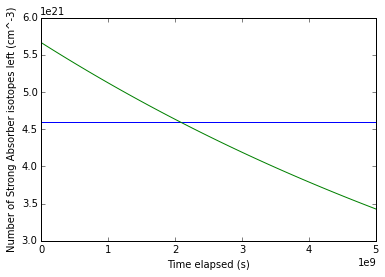

In [233]:
#graph. The intersection is an estimated lifetime
horizontal = []
i = 0
while i < 51:
    horizontal.append(4.6*10**21)
    i+=1
plt.plot(time, horizontal)

plt.plot(time, cd_113_lst)
plt.xlabel('Time elapsed (s)')

plt.ylabel('Number of Strong Absorber isotopes left (cm^-3)')

plt.show()